<a href="https://colab.research.google.com/github/FathimaNazarudeen/Deep-Learning/blob/main/dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! unzip "/content/drive/MyDrive/face dataset/fathima.zip"

Archive:  /content/drive/MyDrive/face dataset/fathima.zip
  inflating: fathima/1.jpg           
  inflating: fathima/11.jpg          
  inflating: fathima/12.jpg          
  inflating: fathima/13.jpg          
  inflating: fathima/14.jpg          
  inflating: fathima/15.jpg          
  inflating: fathima/16.jpg          
  inflating: fathima/17.jpg          
  inflating: fathima/18.jpg          
  inflating: fathima/19.jpg          
  inflating: fathima/2.jpg           
  inflating: fathima/20.jpg          
  inflating: fathima/21.jpg          
  inflating: fathima/22.jpg          
  inflating: fathima/3.jpg           
  inflating: fathima/5.jpg           
  inflating: fathima/6.jpg           
  inflating: fathima/7.jpg           
  inflating: fathima/8.jpg           
  inflating: fathima/9.jpg           


In [3]:
! unzip "/content/drive/MyDrive/face dataset/sarath face.zip"

Archive:  /content/drive/MyDrive/face dataset/sarath face.zip
  inflating: sarath face/IMG_20220715_150848.jpg  
  inflating: sarath face/IMG_20220715_150848_1.jpg  
  inflating: sarath face/IMG_20220715_150849.jpg  
  inflating: sarath face/IMG_20220715_150850.jpg  
  inflating: sarath face/IMG_20220715_150850_1.jpg  
  inflating: sarath face/IMG_20220715_150851.jpg  
  inflating: sarath face/IMG_20220715_150852.jpg  
  inflating: sarath face/IMG_20220715_150852_1.jpg  
  inflating: sarath face/IMG_20220715_150853.jpg  
  inflating: sarath face/IMG_20220715_150858.jpg  
  inflating: sarath face/IMG_20220715_150859.jpg  
  inflating: sarath face/IMG_20220715_150903.jpg  
  inflating: sarath face/IMG_20220715_150904.jpg  
  inflating: sarath face/IMG_20220715_150907.jpg  
  inflating: sarath face/IMG_20220715_150908.jpg  
  inflating: sarath face/IMG_20220715_150912.jpg  
  inflating: sarath face/IMG_20220715_150913.jpg  
  inflating: sarath face/IMG_20220715_150917.jpg  
  inflating: s

In [4]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import Augmentor
p = Augmentor.Pipeline("/content/fathima")
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/fathima/output.

Processing <PIL.Image.Image image mode=RGB size=768x1024 at 0x7FB2891ED050>: 100%|██████████| 100/100 [00:08<00:00, 11.12 Samples/s]


In [6]:
q = Augmentor.Pipeline("/content/sarath face")
q.flip_left_right(0.5)
q.black_and_white(0.1)
q.rotate(0.3, 10, 10)
q.skew(0.4, 0.5)
q.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
q.sample(100)

Initialised with 30 image(s) found.
Output directory set to /content/sarath face/output.

Processing <PIL.Image.Image image mode=RGB size=3008x6528 at 0x7FB287F89650>: 100%|██████████| 100/100 [03:38<00:00,  2.18s/ Samples]


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
train_dir="/content/drive/MyDrive/train"
val_dir="/content/drive/MyDrive/test"

In [9]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [11]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")])

In [12]:
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [15]:
model=model_1.fit(train_data,epochs=100,validation_data=valid_data,steps_per_epoch=50,callbacks=[callback])

Epoch 1/100
50/50 [==============================] - 20s 384ms/step - loss: 0.7366 - accuracy: 0.6800 - val_loss: 0.6729 - val_accuracy: 0.9200
Epoch 2/100
50/50 [==============================] - 19s 375ms/step - loss: 0.5664 - accuracy: 0.8400 - val_loss: 0.2788 - val_accuracy: 1.0000
Epoch 3/100
50/50 [==============================] - 20s 411ms/step - loss: 0.3088 - accuracy: 0.8800 - val_loss: 0.0808 - val_accuracy: 0.9800
Epoch 4/100
50/50 [==============================] - 19s 390ms/step - loss: 0.4577 - accuracy: 0.8600 - val_loss: 0.1621 - val_accuracy: 0.9000
Epoch 5/100
50/50 [==============================] - 19s 390ms/step - loss: 0.1131 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 1.0000


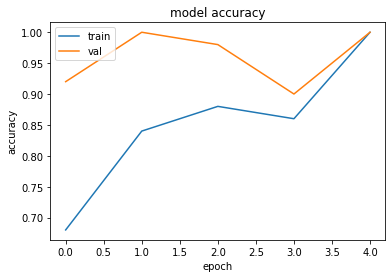

In [16]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

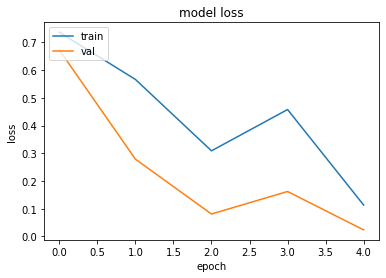

In [17]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 5.1 MB/s 


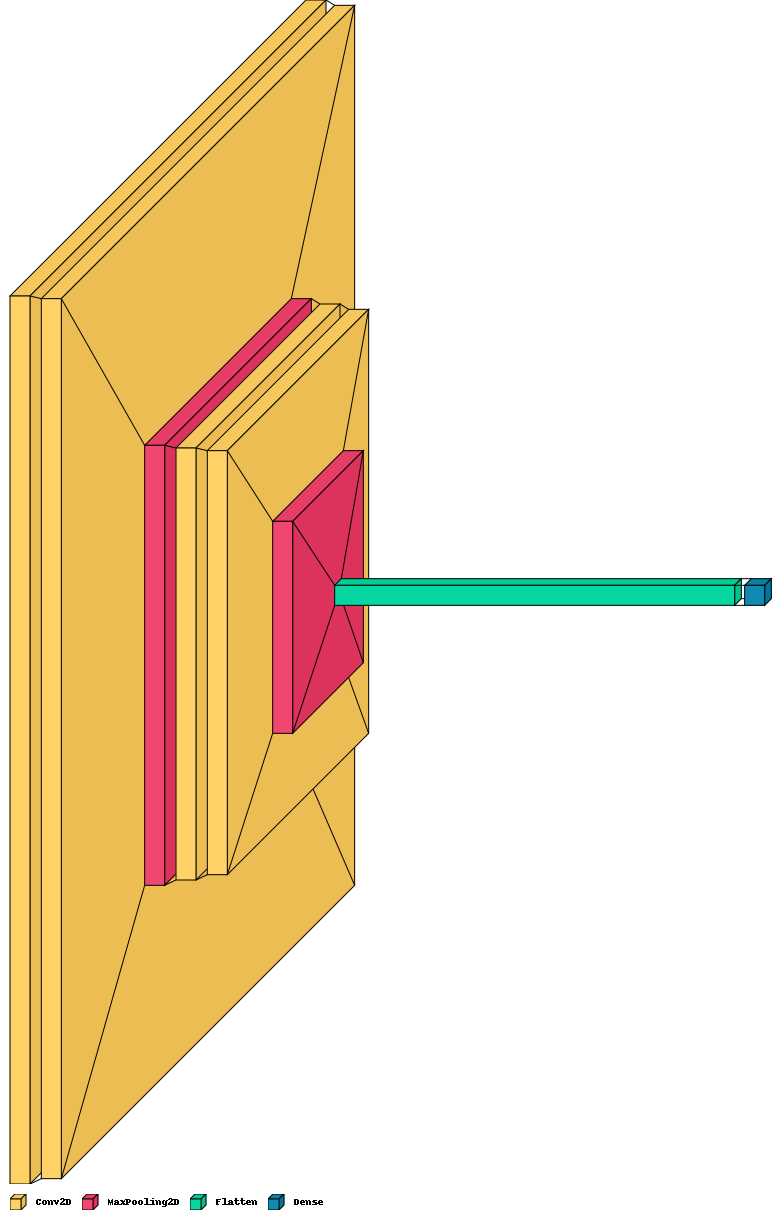

In [19]:
import visualkeras
visualkeras.layered_view(model_1,legend=True)

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  
  print(val)
  #print(val[[0]])
  if val>=0.5:
    plt.xlabel("sarath",fontsize=30)
  elif val<0.5:
    plt.xlabel("fathima",fontsize=30)

[[0.]]


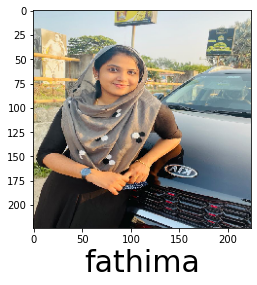

In [39]:
predictImage("/content/drive/MyDrive/test/fathima/3.jpg")

[[1.]]


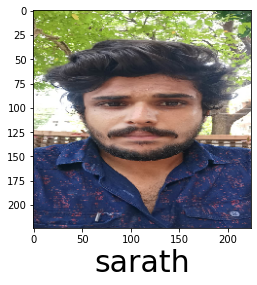

In [28]:
predictImage("/content/sarath.jpg")

[[0.]]


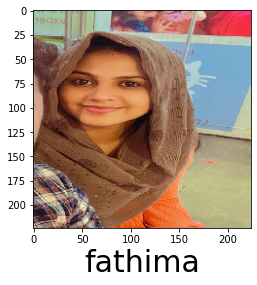

In [40]:
predictImage("/content/2.jpg")